In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
df = pd.read_csv('./laptop_prices.csv')

df.sort_index()

le = LabelEncoder()

for column in df.columns:
    df[column].fillna(df[column].mode(), inplace=True)
    df[column] = le.fit_transform(df[column])


Y = df['Price ($)']
X = df.drop('Price ($)', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [3]:
model = GridSearchCV(
    ElasticNet(fit_intercept=True),
    {
        'alpha': [5, 6, 7, 9],
        'l1_ratio': [0.1, 0.5, 1]
    },
    n_jobs=4
)

In [15]:
model = GridSearchCV(
    RandomForestRegressor(),
    {
        'n_estimators' : [10],
        'criterion' : ['squared_error', 'absolute_error', 'friedman_mse'],
        'min_samples_split' : [2,10,15],
        'max_depth' : [2,5,8] 
    }
)

# Esse demorou 5 min e 30 seg na minha máquina

In [ ]:
model = LinearSVR()

model.fit(X_train, Y_train)

#pula o próximo bloquinho  

LinearSVR()

In [16]:
model.fit(X_train, Y_train)

print(model.best_params_)

model = model.best_estimator_

{'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 10}


In [5]:
mean_absolute_error(Y_test, model.predict(X_test))

1620.2013845280815

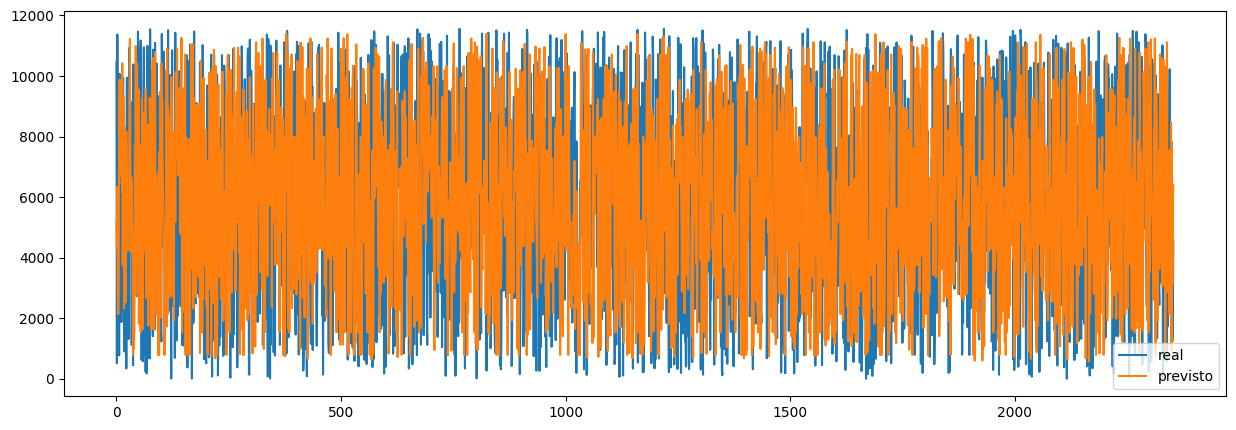

In [17]:
Ypred = model.predict(X_test)

Y_test = Y_test.sort_index()

plt.figure(figsize=(15,5))
plt.plot(Y_test.values)
plt.plot(Ypred)

plt.legend(["real", "previsto"])

plt.show()